# Examples for general profile shapes

In [1]:
from shape_generator import CrossSectionHolding as CrossSection, Circle, csv

## Example for standard egg cross section

In [2]:
profile_dimensions = csv("""
label,name,r
P0,0,30
P1,1,35
P2,2,40
P3,3,45
P4,4,50
P5,5,55
P6,6,60
P7,6a,65
""")
unit = 'cm'
profile_dimensions

,name,r
label,,
P0,0,30
P1,1,35
P2,2,40
P3,3,45
P4,4,50
P5,5,55
P6,6,60
P7,6a,65


In [3]:
label = 'P0'
name, r = profile_dimensions.loc[label].values
R = 3 * r
roh = r / 2
height = r * 3
width = r * 2
# h1 = roh - (r + roh) / (R - roh) * roh
h1 = r/ 5

cross_section = CrossSection(label=label, description=name, width=width, height=height, unit=unit)
cross_section.add(Circle(roh, x_m=roh))
cross_section.add(h1)
cross_section.add(Circle(R, x_m=2 * r, y_m=-(R - r)))
cross_section.add(2 * r)
cross_section.add(Circle(r, x_m=2 * r))

In [4]:
import pandas as pd
pd.DataFrame(cross_section.get_points()).T.rename(columns={0:'$h_i$', 1:'$A_i$'})

,$h_i$,$A_i$
0,0.00,0.000000
1,0.27,2.833214
2,1.08,5.588703
3,2.43,8.185053
4,4.23,10.440647
5,6.18,12.134649
6,11.04,15.517669
7,15.36,18.149027
8,19.77,20.508056
9,24.45,22.681301


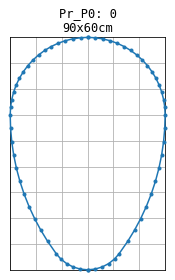

In [5]:
fig = cross_section.profile_figure()

## Example for custom cross section

In [6]:
def add_and_show(cs, *args, **kwargs):
    cs.add(*args, **kwargs)
    print('-' * 5, *cs.shape_description, '-' * 5, sep='\n')
    cs.profile_figure()

-----
Circle Function (radius=20.00, mid=[20.00, 0.00])
-----


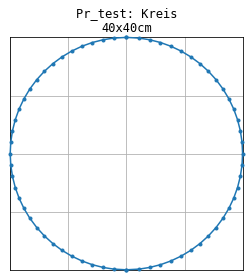

In [7]:
no = 'test'
name = 'Kreis'
r = 20  # cm
unit = 'cm'

kreis = CrossSection(label=no, description=name, height=2*r, unit=unit)
add_and_show(kreis, Circle(r, x_m=r))

-----
Circle Function (radius=20.00, mid=[20.00, 0.00])
Slope Function (k=-1.00, zero=[20.00, 20.00])
-----


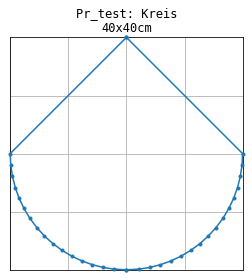

In [8]:
add_and_show(kreis, r)

-----
Circle Function (radius=20.00, mid=[20.00, 0.00])
Slope Function (k=0.58, zero=[20.00, 20.00])
-----


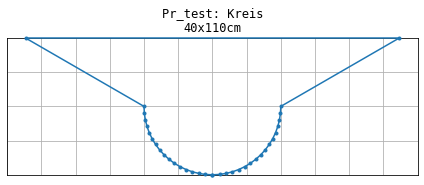

In [9]:
add_and_show(kreis, 30, '°slope')

-----
Circle Function (radius=20.00, mid=[20.00, 0.00])
Slope Function (k=0.58, zero=[20.00, 20.00])
Slope Function (k=-0.47, zero=[25.77, 30.00])
-----


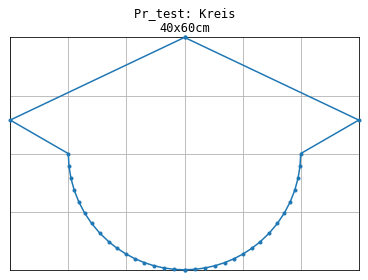

In [10]:
add_and_show(kreis, None,1.5*r)